# Asymptotic Behavior Visualization

This notebook demonstrates `boofun`'s visualization tools for observing how Boolean function properties grow with n.

**Key Features:**
- Track properties like influence, noise stability, spectral concentration
- Compare theoretical predictions with computed values
- Visualize multiple families side-by-side
- Analyze convergence rates

In [1]:
# Install/upgrade boofun (required for Colab)
# This ensures you have the latest version with all features
!pip install --upgrade boofun -q

import boofun as bf
print(f"BooFun version: {bf.__version__}")


[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


/Users/gabrieltaboada/dev/Boofun/boofun/src/boofun/core/errormodels.py:21: UserWarning: uncertainties library not available - some error models disabled
  warnings.warn("uncertainties library not available - some error models disabled")


/Users/gabrieltaboada/dev/Boofun/boofun/src/boofun/quantum/__init__.py:22: UserWarning: Qiskit not available - quantum features limited
  warnings.warn("Qiskit not available - quantum features limited")


BooFun version: 1.1.1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import boofun as bf
from boofun.families import (
    MajorityFamily, ParityFamily, TribesFamily, 
    ANDFamily, LTFFamily, GrowthTracker
)
from boofun.visualization import BooleanFunctionVisualizer
from boofun.visualization.growth_plots import GrowthVisualizer, quick_growth_plot

%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')

## 1. Single Function Visualization

First, let's visualize properties of a single Boolean function:

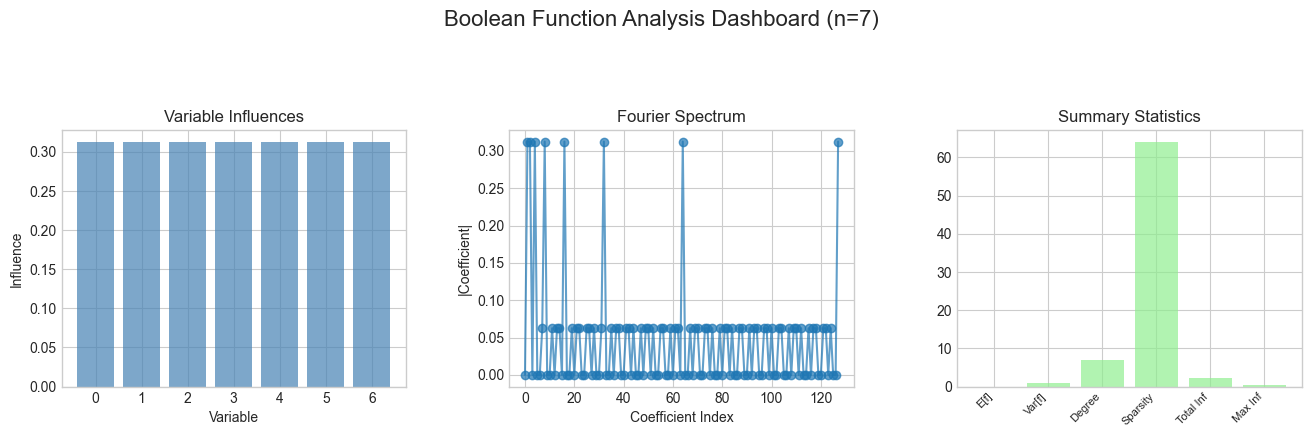

In [3]:
# Create a Majority function and visualize
maj7 = bf.majority(7)
viz = BooleanFunctionVisualizer(maj7)

# Dashboard view
fig = viz.create_dashboard(show=True)

## 2. Tracking Growth: Total Influence

The most fundamental asymptotic question: how does total influence $I[f_n]$ grow with n?

**Key Results:**
- Majority: $I[MAJ_n] \approx \sqrt{\frac{2}{\pi}} \cdot \sqrt{n} \approx 0.798\sqrt{n}$
- Parity: $I[XOR_n] = n$
- AND/OR: $I[AND_n] = n \cdot 2^{-(n-1)} \to 0$

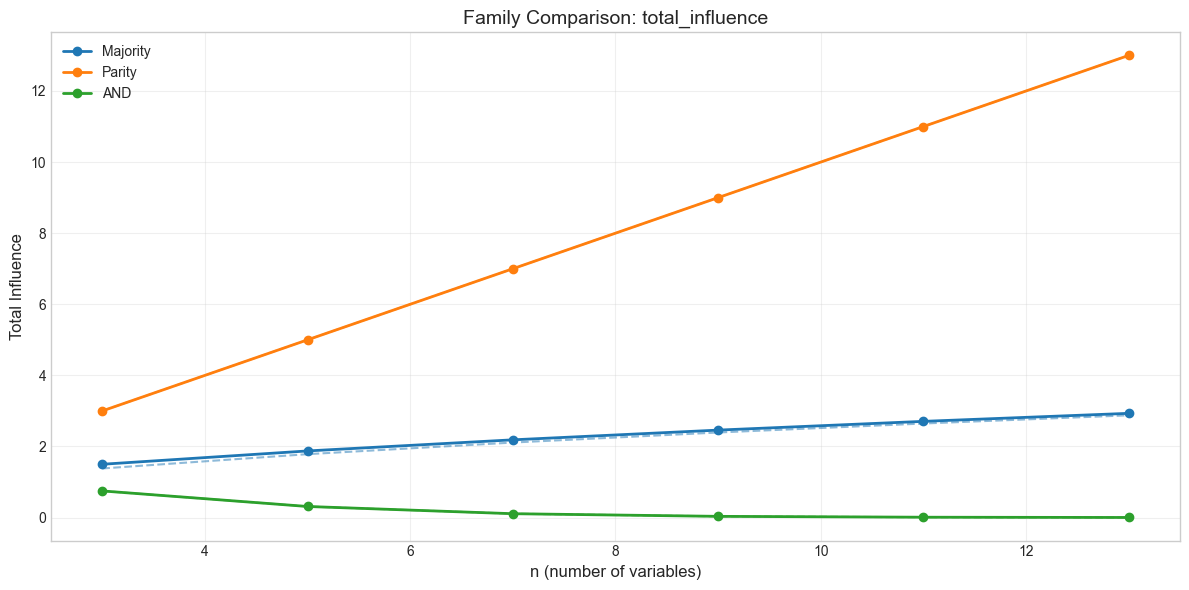

In [4]:
# Create trackers for different families
families = {
    'Majority': MajorityFamily(),
    'Parity': ParityFamily(),
    'AND': ANDFamily(),
}

trackers = {}
n_values = [3, 5, 7, 9, 11, 13]

for name, family in families.items():
    tracker = GrowthTracker(family)
    tracker.mark('total_influence')
    valid_n = [n for n in n_values if family.validate_n(n)]
    tracker.observe(n_values=valid_n)
    trackers[name] = tracker

# Compare families
viz = GrowthVisualizer()
fig = viz.plot_family_comparison(trackers, 'total_influence', show_theory=True)
plt.show()

## 3. Convergence Rate Analysis

To verify the $\sqrt{n}$ law for Majority, we plot $I[MAJ_n] / \sqrt{n}$ and check if it converges to $\sqrt{2/\pi} \approx 0.798$:

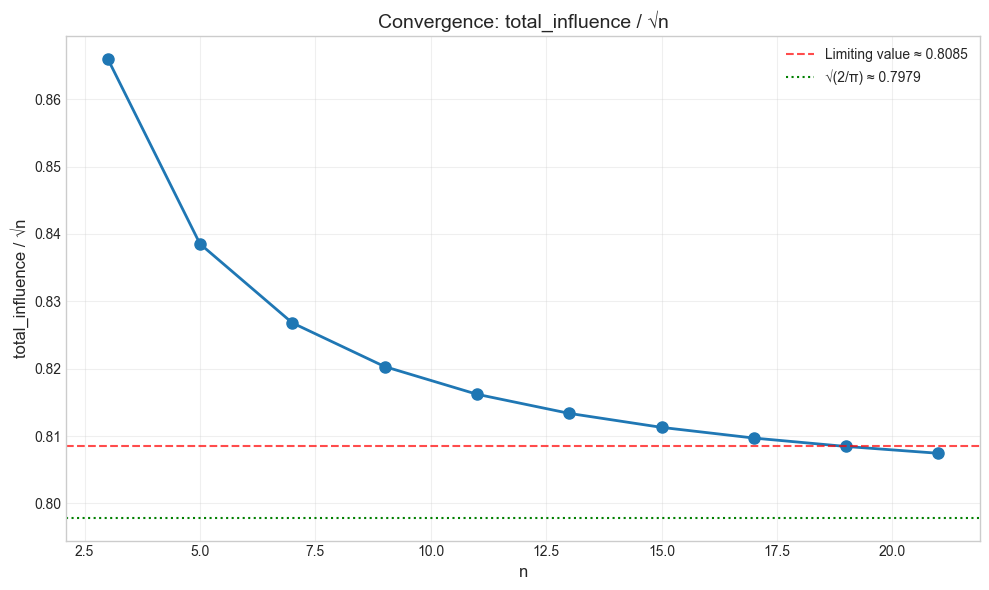

Theoretical limit: √(2/π) ≈ 0.7979


In [5]:
# Convergence rate for Majority
maj_tracker = GrowthTracker(MajorityFamily())
maj_tracker.mark('total_influence')
maj_tracker.observe(n_values=[3, 5, 7, 9, 11, 13, 15, 17, 19, 21])

fig = viz.plot_convergence_rate(maj_tracker, 'total_influence', reference='sqrt_n')
plt.axhline(y=np.sqrt(2/np.pi), color='green', linestyle=':', 
           label=f'√(2/π) ≈ {np.sqrt(2/np.pi):.4f}')
plt.legend()
plt.show()

print(f"Theoretical limit: √(2/π) ≈ {np.sqrt(2/np.pi):.4f}")

## 4. LTF Weight Patterns

Different weight patterns lead to different asymptotic behavior:

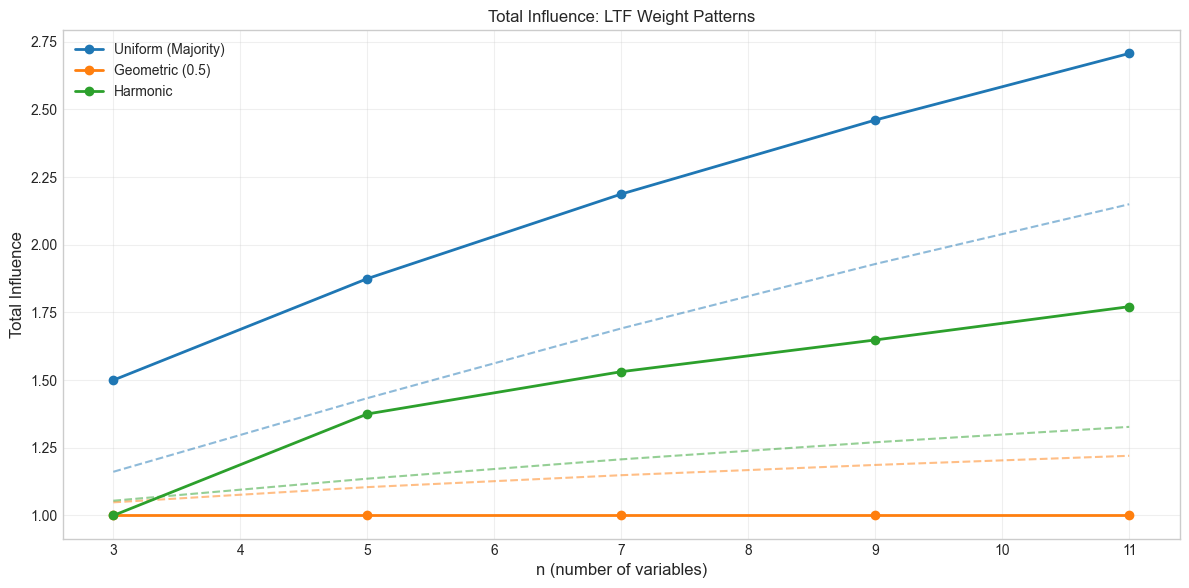

In [6]:
# Compare different LTF weight patterns
ltf_families = {
    'Uniform (Majority)': LTFFamily.uniform(),
    'Geometric (0.5)': LTFFamily.geometric(0.5),
    'Harmonic': LTFFamily.harmonic(),
}

ltf_trackers = {}
for name, family in ltf_families.items():
    tracker = GrowthTracker(family)
    tracker.mark('total_influence')
    tracker.observe(n_values=[3, 5, 7, 9, 11])
    ltf_trackers[name] = tracker

fig = viz.plot_family_comparison(ltf_trackers, 'total_influence')
plt.title('Total Influence: LTF Weight Patterns')
plt.show()

## Summary: Visualization Capabilities

### Single Function (`BooleanFunctionVisualizer`)
- `plot_influences()` - Bar chart of variable influences
- `plot_fourier_spectrum()` - Coefficients by degree + cumulative concentration
- `plot_truth_table()` - Table or heatmap
- `plot_noise_stability_curve()` - Stability vs ρ
- `create_dashboard()` - Combined view

### Growth Analysis (`GrowthVisualizer`)
- `plot_growth()` - Single property vs n with theory overlay
- `plot_family_comparison()` - Compare multiple families
- `plot_convergence_rate()` - Ratio to reference function
- `plot_multi_property_growth()` - Multiple properties side by side

### Quick Plotting
```python
# One-liner to visualize any family
quick_growth_plot("majority", ["total_influence", "variance"])
```

### What to Track
- `total_influence` - $I[f]$
- `influence_i` - $Inf_i[f]$
- `noise_stability` - $Stab_\rho[f]$
- `variance` - $Var[f]$
- `fourier_degree` - $deg(f)$
- `spectral_concentration` - Weight on low degrees
- Custom properties via lambda functions